In [1]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [2]:
# directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/unloading/06_14_nat_unloading' # uni
directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # home

In [3]:
# b = []
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if not os.path.isdir(f):
#         b.append(bagreader(f))

calibration = []
trial = []
baseline = []
mvc = []

for filename in os.listdir(directory):
    file = os.path.splitext(filename)[0]
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        if file == 'calibration':
            calibration.append(bagreader(f))
        elif file.find('trial') != -1:
            trial.append(bagreader(f))
        elif file.find('baseline') != -1:
            baseline.append(bagreader(f))
        elif file.find('mvc') != -1:
            mvc.append(bagreader(f))

[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/mvc already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/calibration already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3 already exists. Not creat

### List of available topics 

In [10]:
# Get topics in bag
trial[0].topic_table

,Topics,Types,Message Count,Frequency
0,Ws,std_msgs/Float64,30819,200.038345
1,compensation,std_msgs/Float64,30819,200.043115
2,down_Ws,std_msgs/Float64,30819,200.052657
3,down_sensor,std_msgs/Float64,9656,66.342476
4,emg_raw,std_msgs/Float64MultiArray,5272,19.366788
5,emg_rms,std_msgs/Float64,5298,19.406215
6,held_object,darknet_ros_msgs/BoundingBox,38,0.359176
7,load_trial,sync_msgs/MassTrial,10,0.066667
8,load_type,sync_msgs/TrialType,30,0.333333
9,mass_change,sync_msgs/MassTrial,38,0.359075


### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [11]:
mvc[0].topic_table

,Topics,Types,Message Count,Frequency
0,/rms_samples,std_msgs/Float64,636,18.948143


In [4]:
# MVC
mvc_csv = mvc[0].message_by_topic('/rms_samples')
mvc_max = pd.read_csv(mvc_csv)['data'].max()
print(mvc_max)

0.0837975294663056


In [5]:
trial_emg_list = []
trial_rms_list = []
trial_type_list = []
trial_state_list = []
trial_mass_list = []
baseline_emg_list = []
baseline_rms_list = []
baseline_type_list = []


for bag in trial:
    trial_emg_list.append(bag.message_by_topic('emg_raw'))
    trial_rms_list.append(bag.message_by_topic('emg_rms'))
    trial_type_list.append(bag.message_by_topic('load_type'))
    trial_state_list.append(bag.message_by_topic('state'))
    trial_mass_list.append(bag.message_by_topic('mass_change'))

for bag in baseline:
    baseline_emg_list.append(bag.message_by_topic('emg_raw'))
    baseline_rms_list.append(bag.message_by_topic('emg_rms'))
    baseline_type_list.append(bag.message_by_topic('load_type'))

### Create pandas data frames from csv files

Function to convert csv to data frame:

In [6]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [7]:
trial_emg_dflist = csv2df(trial_emg_list)
trial_rms_dflist = csv2df(trial_rms_list)
trial_type_dflist = csv2df(trial_type_list)
trial_state_dflist = csv2df(trial_state_list)
trial_mass_dflist = csv2df(trial_mass_list)

baseline_emg_dflist = csv2df(baseline_emg_list)
baseline_rms_dflist = csv2df(baseline_rms_list)
baseline_type_dflist = csv2df(baseline_type_list)

#### General information on collected data

In [16]:
# Experiment Information
trial_state_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,q_state.q,q_state.qd,q_state.qdd,tau,force_up,force_down
0,1.686747e+09,179712,1686747179,712351971,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
1,1.686747e+09,179713,1686747179,719157118,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
2,1.686747e+09,179714,1686747179,723201403,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
3,1.686747e+09,179715,1686747179,731216803,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
4,1.686747e+09,179716,1686747179,732358305,NaN,61.421443,-2.450983e-14,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30824,1.686747e+09,210536,1686747333,837590275,NaN,98.741596,1.410832e-04,-0.001443,0.0,0.0,0.0
30825,1.686747e+09,210537,1686747333,842569418,NaN,98.741596,1.342212e-04,-0.001372,0.0,0.0,0.0
30826,1.686747e+09,210538,1686747333,847643822,NaN,98.741597,1.276929e-04,-0.001306,0.0,0.0,0.0
30827,1.686747e+09,210539,1686747333,853746474,NaN,98.741598,1.214822e-04,-0.001242,0.0,0.0,0.0


In [17]:
# Response Analysis Data
trial_emg_dflist[0]

,Time,layout.dim,layout.data_offset,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9
0,1.686747e+09,[],0,0.004460,0.099893,0.088791,0.009215,0.227905,0.687988,0.624634,-7.519084,14.503817,-4.274809
1,1.686747e+09,[],0,0.004538,0.099854,0.088633,0.009522,0.226196,0.684204,0.621277,-7.312977,14.587787,-4.297710
2,1.686747e+09,[],0,0.004269,0.099590,0.087469,0.010233,0.226685,0.683899,0.620178,-7.786260,14.564885,-4.137404
3,1.686747e+09,[],0,0.004466,0.099595,0.087945,0.009899,0.224670,0.686646,0.618896,-7.725191,14.450381,-4.267176
4,1.686747e+09,[],0,0.005061,0.100312,0.088959,0.010096,0.227966,0.682495,0.620483,-7.603054,14.198473,-4.328244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,1.686747e+09,[],0,0.009594,0.011119,0.029222,0.009479,0.287781,0.742188,0.531128,-5.572519,14.343512,-4.610687
5268,1.686747e+09,[],0,0.011437,0.010882,0.048445,0.009342,0.287964,0.738892,0.528992,-6.687023,14.587787,-4.366412
5269,1.686747e+09,[],0,0.010032,0.011286,0.043087,0.010051,0.291748,0.741455,0.527405,-6.801527,14.251908,-4.366412
5270,1.686747e+09,[],0,0.011437,0.009617,0.044317,0.006321,0.286621,0.740601,0.530823,-6.687023,14.465649,-4.190840


In [18]:
trial_rms_dflist[0]

,Time,data
0,1.686747e+09,0.004916
1,1.686747e+09,0.004947
2,1.686747e+09,0.004838
3,1.686747e+09,0.004783
4,1.686747e+09,0.004702
...,...,...
5293,1.686747e+09,0.008802
5294,1.686747e+09,0.008825
5295,1.686747e+09,0.009505
5296,1.686747e+09,0.009874


In [19]:
trial_type_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,type
0,1.686747e+09,0,1686747183,859125044,NaN,rest
1,1.686747e+09,1,1686747186,859125109,NaN,load
2,1.686747e+09,2,1686747195,859125139,NaN,unload
3,1.686747e+09,3,1686747198,859125171,NaN,rest
4,1.686747e+09,4,1686747201,859125192,NaN,load
5,1.686747e+09,5,1686747210,859125320,NaN,unload
6,1.686747e+09,6,1686747213,859125338,NaN,rest
7,1.686747e+09,7,1686747216,859125355,NaN,load
8,1.686747e+09,8,1686747225,859125482,NaN,unload
9,1.686747e+09,9,1686747228,859125526,NaN,rest


In [35]:
trial_mass_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,object,mass
0,1.686747e+09,46,1686747188,450250177,NaN,bottle,0.5
1,1.686747e+09,47,1686747188,962761168,NaN,NONE,0.0
2,1.686747e+09,48,1686747190,97697004,NaN,bottle,0.5
3,1.686747e+09,49,1686747190,827503284,NaN,NONE,0.0
4,1.686747e+09,50,1686747203,663230667,NaN,bottle,0.5
5,1.686747e+09,51,1686747212,648167575,NaN,NONE,0.0
6,1.686747e+09,52,1686747218,312883242,NaN,bottle,0.5
7,1.686747e+09,53,1686747223,47616893,NaN,NONE,0.0
8,1.686747e+09,54,1686747223,147786397,NaN,bottle,0.5
9,1.686747e+09,55,1686747223,162751429,NaN,NONE,0.0


## Plot EMG data

In [8]:
plt.style.use('seaborn')

In [9]:
def draw_background(axis, type_array, rms_array, min, max):
    time = type_array['Time'].to_numpy()
    trial_type = type_array['type'].to_numpy()

    trial_time = []
    for i in range(time.size):
        if i == time.size - 1:
            trial_time = [time[i] - rms_array['Time'].iloc[0], rms_array['Time'].iloc[-1] - rms_array['Time'].iloc[0]]
        else:
            trial_time = [time[i] - rms_array['Time'].iloc[0], time[i+1] - rms_array['Time'].iloc[0]]

        if trial_type[i] == 'rest':
            axis.fill_between(trial_time, min, max, alpha=0.2, color='blue')
        elif trial_type[i] == 'load':
            axis.fill_between(trial_time, min, max, alpha=0.2, color='green')
        elif trial_type[i] == 'unload':
            axis.fill_between(trial_time, min, max, alpha=0.2, color='yellow')

### Live RMS EMG Data

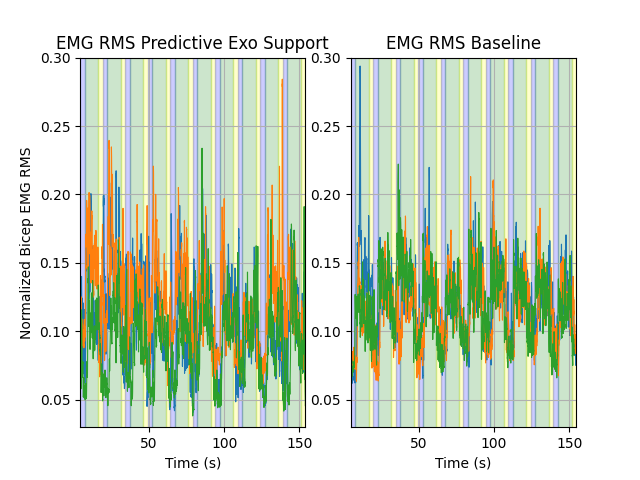

In [23]:
plt.close('all')
fig, ax = plt.subplots(1, 2)
ax[0].plot(trial_rms_dflist[0]['Time'] - trial_rms_dflist[0]['Time'].iloc[0], trial_rms_dflist[0]['data']/mvc_max, linewidth=0.8)
ax[0].plot(trial_rms_dflist[1]['Time'] - trial_rms_dflist[1]['Time'].iloc[0], trial_rms_dflist[1]['data']/mvc_max, linewidth=0.8)
ax[0].plot(trial_rms_dflist[2]['Time'] - trial_rms_dflist[2]['Time'].iloc[0], trial_rms_dflist[2]['data']/mvc_max, linewidth=0.8)

draw_background(ax[0], trial_type_dflist[0], trial_rms_dflist[0])

ax[0].set_ylim([0.03, 0.3])
ax[0].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_rms_dflist[0]['Time'].iloc[0], trial_rms_dflist[0]['Time'].iloc[-1] - trial_rms_dflist[0]['Time'].iloc[0]])
ax[0].set_title('EMG RMS Predictive Exo Support')
ax[0].set_ylabel('Normalized Bicep EMG RMS')
ax[0].set_xlabel('Time (s)')
ax[0].grid()

ax[1].plot(baseline_rms_dflist[0]['Time'] - baseline_rms_dflist[0]['Time'].iloc[0], baseline_rms_dflist[0]['data']/mvc_max, linewidth=0.8)
ax[1].plot(baseline_rms_dflist[1]['Time'] - baseline_rms_dflist[1]['Time'].iloc[0], baseline_rms_dflist[1]['data']/mvc_max, linewidth=0.8)
ax[1].plot(baseline_rms_dflist[2]['Time'] - baseline_rms_dflist[2]['Time'].iloc[0], baseline_rms_dflist[2]['data']/mvc_max, linewidth=0.8)

draw_background(ax[1], baseline_type_dflist[0], baseline_rms_dflist[0])

ax[1].set_ylim([0.03, 0.3])
ax[1].set_xlim([baseline_type_dflist[0]['Time'].iloc[0] - baseline_rms_dflist[0]['Time'].iloc[0], baseline_rms_dflist[0]['Time'].iloc[-1] - baseline_rms_dflist[0]['Time'].iloc[0]])
ax[1].set_title('EMG RMS Baseline')
ax[1].set_xlabel('Time (s)')
ax[1].grid()

# plt.tight_layout()

### EMG Data Custom RMS

In [11]:
def compute_RMS(data, window_length):
    data_array = data.to_numpy()
    rms_emg = np.zeros(data_array.size - window_length)
    # rms_emg = []
    for i in range(data_array.size - window_length):
        window = data_array[i: i + window_length]
        # rms_emg.append(np.sqrt(np.mean(np.square(window))))
        rms_emg[i] = np.sqrt(np.mean(np.square(window)))
    return rms_emg

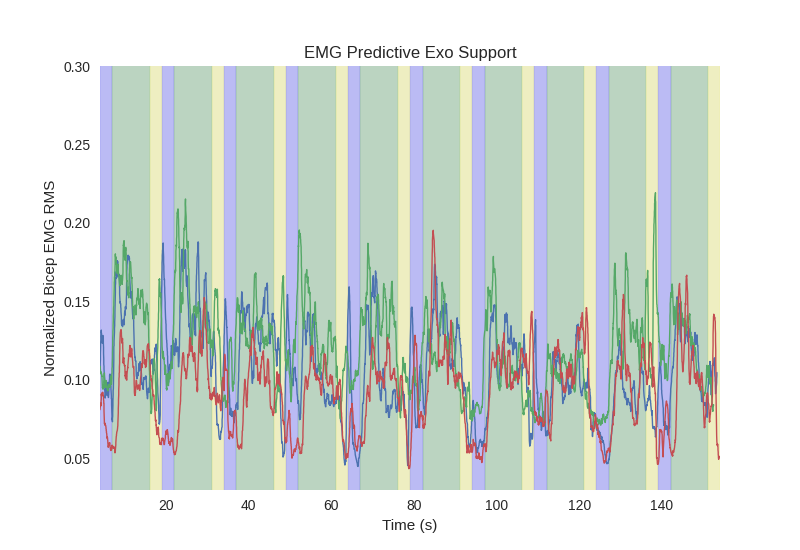

In [13]:
window_length = 25

plt.close('all')
fig, ax = plt.subplots()
ax.plot(trial_emg_dflist[0]['Time'].iloc[:-window_length] - trial_emg_dflist[0]['Time'].iloc[0], compute_RMS(trial_emg_dflist[0]['data_0'], window_length)/mvc_max, linewidth=1)
ax.plot(trial_emg_dflist[1]['Time'].iloc[:-window_length] - trial_emg_dflist[1]['Time'].iloc[0], compute_RMS(trial_emg_dflist[1]['data_0'], window_length)/mvc_max, linewidth=1)
ax.plot(trial_emg_dflist[2]['Time'].iloc[:-window_length] - trial_emg_dflist[2]['Time'].iloc[0], compute_RMS(trial_emg_dflist[2]['data_0'], window_length)/mvc_max, linewidth=1)

draw_background(ax, trial_type_dflist[0], trial_emg_dflist[0], 0, 1)

ax.set_ylim([0.03, 0.3])
ax.set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-1] - trial_emg_dflist[0]['Time'].iloc[0]])
ax.set_title('EMG Predictive Exo Support')
ax.set_ylabel('Normalized Bicep EMG RMS')
ax.set_xlabel('Time (s)')
ax.grid()

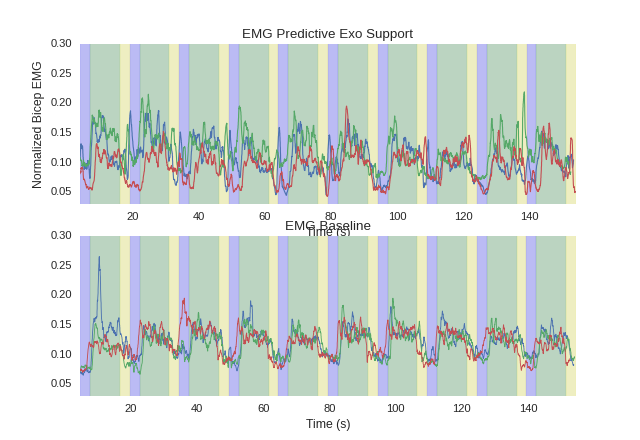

In [113]:
window_length = 25

plt.close('all')
fig, ax = plt.subplots(2,1)
ax[0].plot(trial_emg_dflist[0]['Time'].iloc[:-window_length] - trial_emg_dflist[0]['Time'].iloc[0], compute_RMS(trial_emg_dflist[0]['data_0'], window_length)/mvc_max, linewidth=1)
ax[0].plot(trial_emg_dflist[1]['Time'].iloc[:-window_length] - trial_emg_dflist[1]['Time'].iloc[0], compute_RMS(trial_emg_dflist[1]['data_0'], window_length)/mvc_max, linewidth=1)
ax[0].plot(trial_emg_dflist[2]['Time'].iloc[:-window_length] - trial_emg_dflist[2]['Time'].iloc[0], compute_RMS(trial_emg_dflist[2]['data_0'], window_length)/mvc_max, linewidth=1)

draw_background(ax[0], trial_type_dflist[0], trial_emg_dflist[0], 0, 1)

ax[0].set_ylim([0.03, 0.3])
ax[0].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-1] - trial_emg_dflist[0]['Time'].iloc[0]])
ax[0].set_title('EMG Predictive Exo Support')
ax[0].set_ylabel('Normalized Bicep EMG')
ax[0].set_xlabel('Time (s)')
ax[0].grid()



ax[1].plot(baseline_emg_dflist[0]['Time'].iloc[:-window_length] - baseline_emg_dflist[0]['Time'].iloc[0], compute_RMS(baseline_emg_dflist[0]['data_0'], window_length)/mvc_max, linewidth=0.8)
ax[1].plot(baseline_emg_dflist[1]['Time'].iloc[:-window_length] - baseline_emg_dflist[1]['Time'].iloc[0], compute_RMS(baseline_emg_dflist[1]['data_0'], window_length)/mvc_max, linewidth=0.8)
ax[1].plot(baseline_emg_dflist[2]['Time'].iloc[:-window_length] - baseline_emg_dflist[2]['Time'].iloc[0], compute_RMS(baseline_emg_dflist[2]['data_0'], window_length)/mvc_max, linewidth=0.8)

draw_background(ax[1], baseline_type_dflist[0], baseline_emg_dflist[0], 0, 1)

ax[1].set_ylim([0.03, 0.3])
ax[1].set_xlim([baseline_type_dflist[0]['Time'].iloc[0] - baseline_emg_dflist[0]['Time'].iloc[0], baseline_rms_dflist[0]['Time'].iloc[-1] - baseline_emg_dflist[0]['Time'].iloc[0]])
ax[1].set_title('EMG Baseline')
ax[1].set_xlabel('Time (s)')
ax[1].grid()

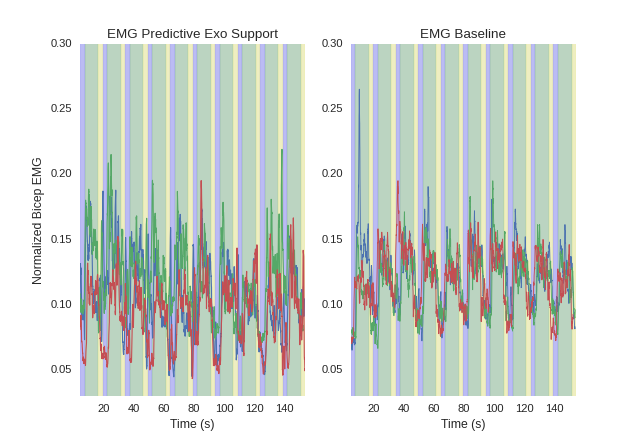

In [84]:
window_length = 25

plt.close('all')
fig, ax = plt.subplots(1,2)
ax[0].plot(trial_emg_dflist[0]['Time'].iloc[:-window_length] - trial_emg_dflist[0]['Time'].iloc[0], compute_RMS(trial_emg_dflist[0]['data_0'], window_length)/mvc_max, linewidth=1)
ax[0].plot(trial_emg_dflist[1]['Time'].iloc[:-window_length] - trial_emg_dflist[1]['Time'].iloc[0], compute_RMS(trial_emg_dflist[1]['data_0'], window_length)/mvc_max, linewidth=1)
ax[0].plot(trial_emg_dflist[2]['Time'].iloc[:-window_length] - trial_emg_dflist[2]['Time'].iloc[0], compute_RMS(trial_emg_dflist[2]['data_0'], window_length)/mvc_max, linewidth=1)

draw_background(ax[0], trial_type_dflist[0], trial_emg_dflist[0], 0, 1)

ax[0].set_ylim([0.03, 0.3])
ax[0].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-1] - trial_emg_dflist[0]['Time'].iloc[0]])
ax[0].set_title('EMG Predictive Exo Support')
ax[0].set_ylabel('Normalized Bicep EMG')
ax[0].set_xlabel('Time (s)')
ax[0].grid()



ax[1].plot(baseline_emg_dflist[0]['Time'].iloc[:-window_length] - baseline_emg_dflist[0]['Time'].iloc[0], compute_RMS(baseline_emg_dflist[0]['data_0'], window_length)/mvc_max, linewidth=0.8)
ax[1].plot(baseline_emg_dflist[1]['Time'].iloc[:-window_length] - baseline_emg_dflist[1]['Time'].iloc[0], compute_RMS(baseline_emg_dflist[1]['data_0'], window_length)/mvc_max, linewidth=0.8)
ax[1].plot(baseline_emg_dflist[2]['Time'].iloc[:-window_length] - baseline_emg_dflist[2]['Time'].iloc[0], compute_RMS(baseline_emg_dflist[2]['data_0'], window_length)/mvc_max, linewidth=0.8)

draw_background(ax[1], baseline_type_dflist[0], baseline_emg_dflist[0], 0, 1)

ax[1].set_ylim([0.03, 0.3])
ax[1].set_xlim([baseline_type_dflist[0]['Time'].iloc[0] - baseline_emg_dflist[0]['Time'].iloc[0], baseline_rms_dflist[0]['Time'].iloc[-1] - baseline_emg_dflist[0]['Time'].iloc[0]])
ax[1].set_title('EMG Baseline')
ax[1].set_xlabel('Time (s)')
ax[1].grid()

### Trial Average

In [103]:
test = trial_emg_dflist[0].Time
test = test[test > trial_type_dflist[0].Time[0]]

i =0
for trial in trial_emg_dflist:
    test = trial.Time
    test = test[test > trial_type_dflist[i].Time[0]]
    print(test.iloc[0])
    print(len(test))
    i+=1

1686747183.907493
5125
1686747524.8096557
5119
1686746879.832116
5164


In [111]:
# test = trial_emg_dflist[0].Time
# test = test[test >= trial_type_dflist[0].Time[1]]
# test = test[test <= trial_type_dflist[0].Time[2]]

i = 0
for trial in trial_emg_dflist:
    test = trial.Time
    test = test[test >= trial_type_dflist[i].Time[1]]
    test = test[test <= trial_type_dflist[i].Time[2]]
    print(len(test))
    i+=1

320
295
315


### Plot Force Data

## Overview Plot

### 1 Trial

Text(0.5, 0, 'Time (s)')

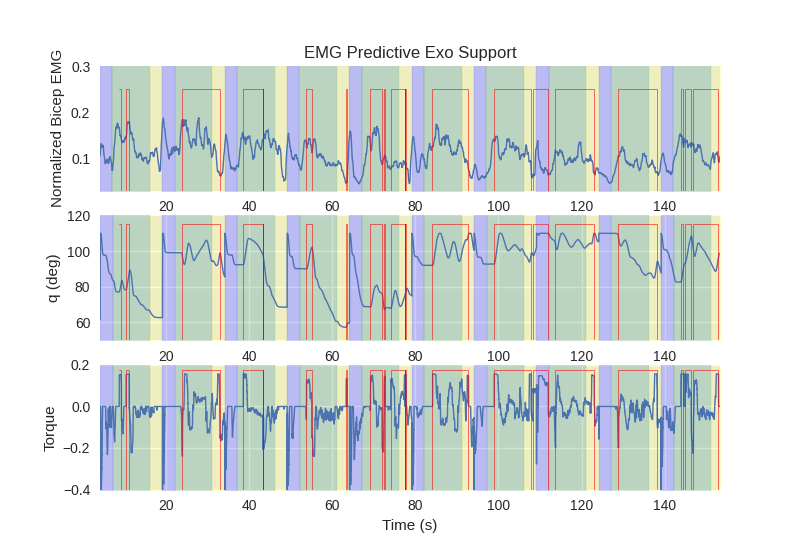

In [53]:
plt.close('all')
fig, ax = plt.subplots(3,1)

# EMG
ax[0].plot(trial_emg_dflist[0]['Time'].iloc[:-window_length] - trial_emg_dflist[0]['Time'].iloc[0], compute_RMS(trial_emg_dflist[0]['data_0'], window_length)/mvc_max, linewidth=1)
ax[0].step(trial_mass_dflist[0]['Time'] - trial_emg_dflist[0]['Time'].iloc[0], trial_mass_dflist[0]['mass']*0.5, where='post', linewidth=0.4, color='red')
draw_background(ax[0], trial_type_dflist[0], trial_emg_dflist[0], 0, 1)

ax[0].set_ylim([0.03, 0.3])
ax[0].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-window_length-1] - trial_emg_dflist[0]['Time'].iloc[0]])
ax[0].set_title('EMG Predictive Exo Support')
ax[0].set_ylabel('Normalized Bicep EMG')
# ax[0].set_yticks([0.1, 0.2, 0.3])
# ax[0].set_xlabel('Time (s)')
ax[0].grid()

# q
ax[1].plot(trial_state_dflist[0]['Time'] - trial_state_dflist[0]['Time'][0], trial_state_dflist[0]['q_state.q'], linewidth=1)
ax[1].step(trial_mass_dflist[0]['Time'] - trial_emg_dflist[0]['Time'].iloc[0], trial_mass_dflist[0]['mass']*230, where='post', linewidth=0.4, color='red')
draw_background(ax[1], trial_type_dflist[0], trial_state_dflist[0], 0, 120)
ax[1].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-window_length-1] - trial_emg_dflist[0]['Time'].iloc[0]])
ax[1].set_ylim([50, 120])
ax[1].set_ylabel('q (deg)')


# mass
# ax[2].step(trial_mass_dflist[0]['Time'] - trial_emg_dflist[0]['Time'].iloc[0], trial_mass_dflist[0]['mass'], where='post', linewidth=1, color='red')
# draw_background(ax[2], trial_type_dflist[0], trial_state_dflist[0], 0, 0.6)
# ax[2].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-window_length-1] - trial_emg_dflist[0]['Time'].iloc[0]])
# ax[2].set_ylim([0, 0.6])

# tau
ax[2].plot(trial_state_dflist[0]['Time'] - trial_state_dflist[0]['Time'][0], trial_state_dflist[0]['tau'], linewidth=1)
ax[2].step(trial_mass_dflist[0]['Time'] - trial_emg_dflist[0]['Time'].iloc[0], trial_mass_dflist[0]['mass']*1.15 - 0.4, where='post', linewidth=0.4, color='red')
draw_background(ax[2], trial_type_dflist[0], trial_state_dflist[0], -2, 0.2)
ax[2].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-window_length-1] - trial_emg_dflist[0]['Time'].iloc[0]])
ax[2].set_ylim([-0.4, 0.2])
ax[2].set_ylabel('Torque')
ax[2].set_xlabel('Time (s)')

In [ ]:
def plot_overview(ax, ):